In [16]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('globalcount_data.csv')

In [3]:
df.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,...,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,...,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,...,SINGA,SINGA,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [5]:
df['country_of_residence'].value_counts().sort_values(ascending = False)

Switzerland                 2335
Belarus                     2151
Russian Federation          1913
Ukraine                     1338
Kazakhstan                  1320
                            ... 
Mauritius                      1
Cyprus                         1
Cabo Verde                     1
Central African Republic       1
Cayman Islands                 1
Name: country_of_residence, Length: 155, dtype: int64

<AxesSubplot:>

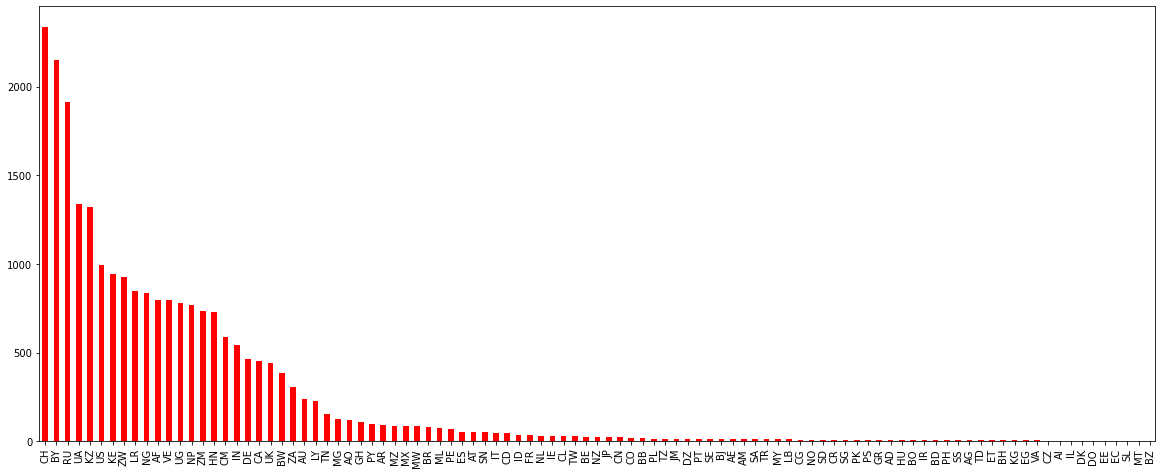

In [6]:
# ch is switzerland
df['iso3166'].value_counts().sort_values(ascending = False)[:99].plot(kind = 'bar', figsize = (20,8), color = 'red')

<AxesSubplot:>

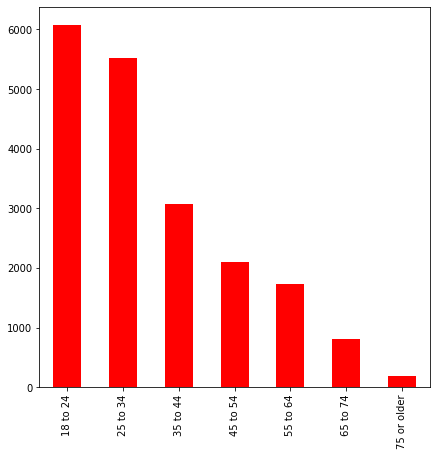

In [7]:
df['age'].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = 'red', figsize = (7,7))

In [8]:
count = df['unique_id'].count()
women =  df['woman'].sum()/count
men = df['cisgender_man'].sum()/count
black = df['black_or_of_african_descent'].sum()/count
hisp = df['hispanic_or_latinx'].sum()/count
ratio_list = [women, men, black, hisp]

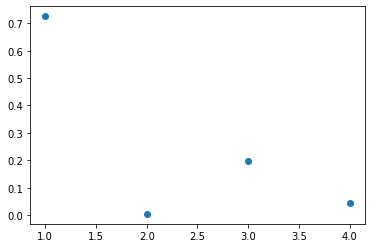

In [9]:
# Ratios of sex/race demographics
plt.scatter([1,2,3,4], ratio_list)

In [10]:
df['age'].mode()

0    18 to 24
dtype: object

In [11]:
df['black_or_of_african_descent'].sum()

4760

In [12]:
df.loc[:,'country_of_residence']

0        United Kingdom of Great Britain and Northern I...
1        United Kingdom of Great Britain and Northern I...
2                                                   Canada
3                                              Switzerland
4                                                  Belgium
                               ...                        
24046                                          Switzerland
24047                                   Russian Federation
24048                                          Switzerland
24049                                          Switzerland
24050                                          Switzerland
Name: country_of_residence, Length: 24051, dtype: object

In [13]:
# analysis of issues affecting people locally (city)
analysis = df.iloc[:,58:70]
analysis['country'] = df.loc[:,'country_of_residence']


In [14]:
analysis.head()

,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,country
0,0,0,0,1,0,0,1,0,1,0,0,0,United Kingdom of Great Britain and Northern I...
1,0,0,0,1,0,0,1,0,1,0,0,0,United Kingdom of Great Britain and Northern I...
2,0,0,0,0,0,0,0,0,0,0,0,0,Canada
3,0,0,1,0,0,0,1,0,0,1,0,0,Switzerland
4,1,0,0,0,0,0,1,0,0,1,0,0,Belgium


In [15]:
analysis_long = analysis.melt(id_vars = 'country', var_name = 'issue')

In [16]:
analysis_long.groupby(['country', 'issue']).sum()

value
country     issue                                                    
Afghanistan issue_city_LGBTQI+_rights                               0
            issue_city_civil_rights_and_freedoms                    2
            issue_city_disability_rights                            1
            issue_city_economic_and_workers_rights                  2
            issue_city_education_and_youth_empowerment              1
...                                                               ...
Zimbabwe    issue_city_immigrant_and_refugee_rights                 3
            issue_city_indigenous_andor_roma_rights                 9
            issue_city_racial_equity                                5
            issue_city_reproductive_freedom_and_bodily_auto...     18
            issue_city_sexual_reproductive_and_parental_health     71

[1860 rows x 1 columns]

In [17]:
df['issue_city_civil_rights_and_freedoms'].sum()

2289

In [38]:
analysis_long.groupby(['country', 'issue']).sum().groupby('country').get_group('Canada')

value
country issue                                                    
Canada  issue_person_LGBTQI+_rights                            85
        issue_person_civil_rights_and_freedoms                 83
        issue_person_disability_rights                         49
        issue_person_economic_and_workers_rights               86
        issue_person_education_and_youth_empowerment          102
        issue_person_ending_violence_harassment_and_abuse     303
        issue_person_environmental_justice                    132
        issue_person_immigrant_and_refugee_rights              35
        issue_person_indigenous_andor_roma_rights              70
        issue_person_racial_equity                            169
        issue_person_reproductive_freedom_and_bodily_au...    115
        issue_person_sexual_reproductive_and_parental_h...     81

In [18]:
analysis_long.groupby(['country', 'issue']).sum().groupby('country').get_group('Switzerland')

value
country     issue                                                    
Switzerland issue_city_LGBTQI+_rights                             227
            issue_city_civil_rights_and_freedoms                  490
            issue_city_disability_rights                          152
            issue_city_economic_and_workers_rights                817
            issue_city_education_and_youth_empowerment            385
            issue_city_ending_violence_harassment_and_abuse       561
            issue_city_environmental_justice                      879
            issue_city_immigrant_and_refugee_rights               696
            issue_city_indigenous_andor_roma_rights                22
            issue_city_racial_equity                              487
            issue_city_reproductive_freedom_and_bodily_auto...     28
            issue_city_sexual_reproductive_and_parental_health     52

<AxesSubplot:title={'center':'Analysis of issues (local/city level)'}, ylabel='issue'>

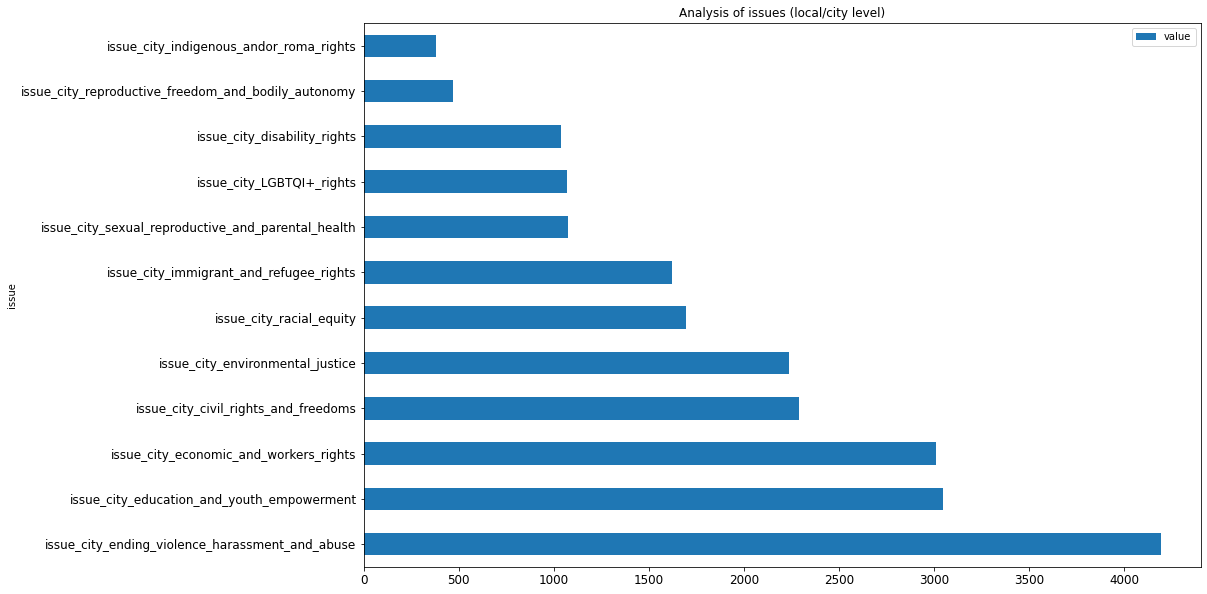

In [19]:
analysis_long.groupby(['issue']).sum().sort_values(by = 'value', ascending = False).plot.barh(title='Analysis of issues (local/city level)', figsize=(15,10), fontsize=12)

In [20]:
analysis = df.iloc[:,34:46]
analysis['country'] = df.loc[:,'country_of_residence']

In [21]:
analysis_long = analysis.melt(id_vars = 'country', var_name = 'issue')

<AxesSubplot:title={'center':'Analysis of issues (global level)'}, ylabel='issue'>

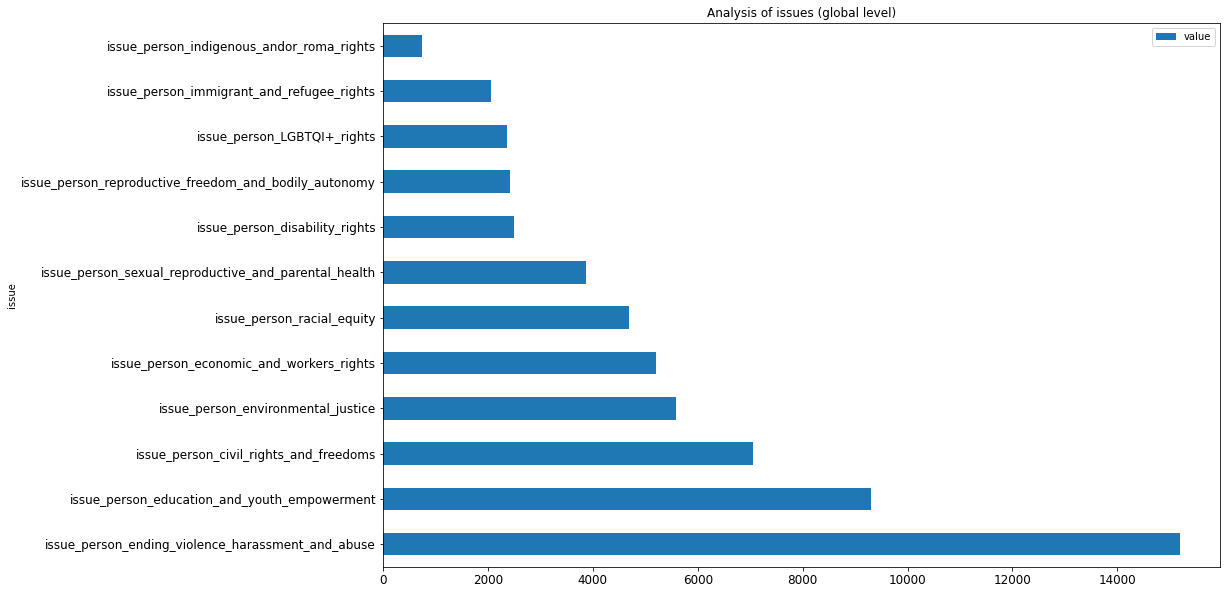

In [22]:
analysis_long.groupby(['issue']).sum().sort_values(by = 'value', ascending = False).plot.barh(title='Analysis of issues (global level)', figsize=(15,10), fontsize=12)

In [23]:
analysis = df.iloc[:,4:14]
analysis['unique_id'] = df.loc[:,'unique_id']
analysis = analysis.reset_index()

In [24]:
analysis.head()

,index,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,unique_id
0,0,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,12327918977
1,1,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,12327959040
2,2,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,12340367937
3,3,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,12340336342
4,4,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,12340427318


In [25]:
df.columns[6:14]

Index(['city_town_tr', 'country_of_residence', 'gender_not_listed',
       'cisgender_man', 'cisgender_woman', 'non_conforming_or_non_binary',
       'gender_choose_not_to_identify', 'man'],
      dtype='object')

In [26]:
analysis_long.drop(analysis_long[analysis_long['value'] == 0].index)

,country,issue,value
8,United States of America,issue_person_civil_rights_and_freedoms,1
16,Kyrgyzstan,issue_person_civil_rights_and_freedoms,1
23,Switzerland,issue_person_civil_rights_and_freedoms,1
24,Greece,issue_person_civil_rights_and_freedoms,1
27,United Kingdom of Great Britain and Northern I...,issue_person_civil_rights_and_freedoms,1
...,...,...,...
288580,United States of America,issue_person_sexual_reproductive_and_parental_...,1
288588,United Kingdom of Great Britain and Northern I...,issue_person_sexual_reproductive_and_parental_...,1
288601,Kenya,issue_person_sexual_reproductive_and_parental_...,1
288605,Switzerland,issue_person_sexual_reproductive_and_parental_...,1


In [27]:
gender = df.columns[8:17]
gender

Index(['gender_not_listed', 'cisgender_man', 'cisgender_woman',
       'non_conforming_or_non_binary', 'gender_choose_not_to_identify', 'man',
       'transgender_man', 'transgender_woman', 'woman'],
      dtype='object')

In [28]:
# this function has been added in utilities.py
# subsequently, import it from there
def gender_func(x):
    gender = []
    if x['gender_not_listed']:
        gender.append('not listed')
    if x['gender_choose_not_to_identify']:
        gender.append('undisclosed')
    if x['cisgender_man']:
        gender.append('cisgender man')
    if x['cisgender_woman']:
        gender.append('cisgender woman')
    if x['non_conforming_or_non_binary']:
        gender.append('non-binary')
    if x['transgender_man']:
        gender.append('transgender man')
    if x['transgender_woman']:
        gender.append('transgender woman')
    if x['man']:
        gender.append('man')
    if x['woman']:
        gender.append('woman')
    if gender == []:
        gender.append('undisclosed')
    
    return ', '.join(gender)


In [39]:
df['gender_list'] = df.apply(gender_func, axis = 1)

In [40]:
df.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,...,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score,new,gender_list
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woman,woman
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,...,NaN,NaN,On,on,ON,NaN,pl,1.00,woman,woman
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undisclosed,undisclosed
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,...,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97,woman,woman
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,...,NaN,More women in high political positions. Access...,SINGA,SINGA,NaN,More women in high political positions. Access...,en,1.00,not listed,not listed


In [53]:
analysis_long.groupby(['gender', 'issue']).sum().groupby('gender').get_group('man')

value
gender issue                                                    
man    issue_person_LGBTQI+_rights                            34
       issue_person_civil_rights_and_freedoms                223
       issue_person_disability_rights                         55
       issue_person_economic_and_workers_rights              122
       issue_person_education_and_youth_empowerment          253
       issue_person_ending_violence_harassment_and_abuse     456
       issue_person_environmental_justice                    288
       issue_person_immigrant_and_refugee_rights             100
       issue_person_indigenous_andor_roma_rights              50
       issue_person_racial_equity                            288
       issue_person_reproductive_freedom_and_bodily_au...     34
       issue_person_sexual_reproductive_and_parental_h...     69

In [41]:
analysis = df.iloc[:,34:46]
analysis['gender'] = df.loc[:,'gender_list']

In [42]:
analysis_long = analysis.melt(id_vars = 'gender', var_name = 'issue')

In [47]:
analysis_long.head()

,gender,issue,value
0,woman,issue_person_civil_rights_and_freedoms,0
1,woman,issue_person_civil_rights_and_freedoms,0
2,undisclosed,issue_person_civil_rights_and_freedoms,0
3,woman,issue_person_civil_rights_and_freedoms,0
4,not listed,issue_person_civil_rights_and_freedoms,0


<AxesSubplot:ylabel='gender'>

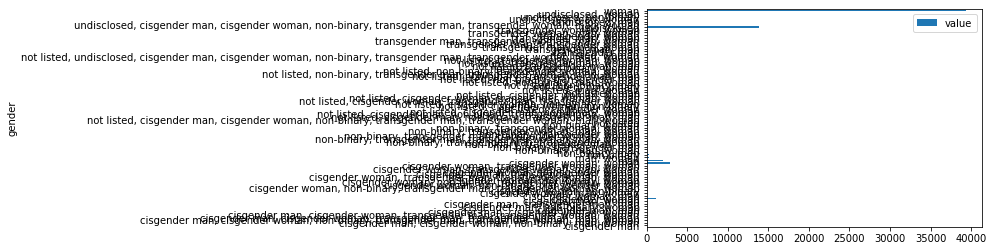

In [48]:
analysis_long.groupby('gender').sum().plot.barh()

<AxesSubplot:>

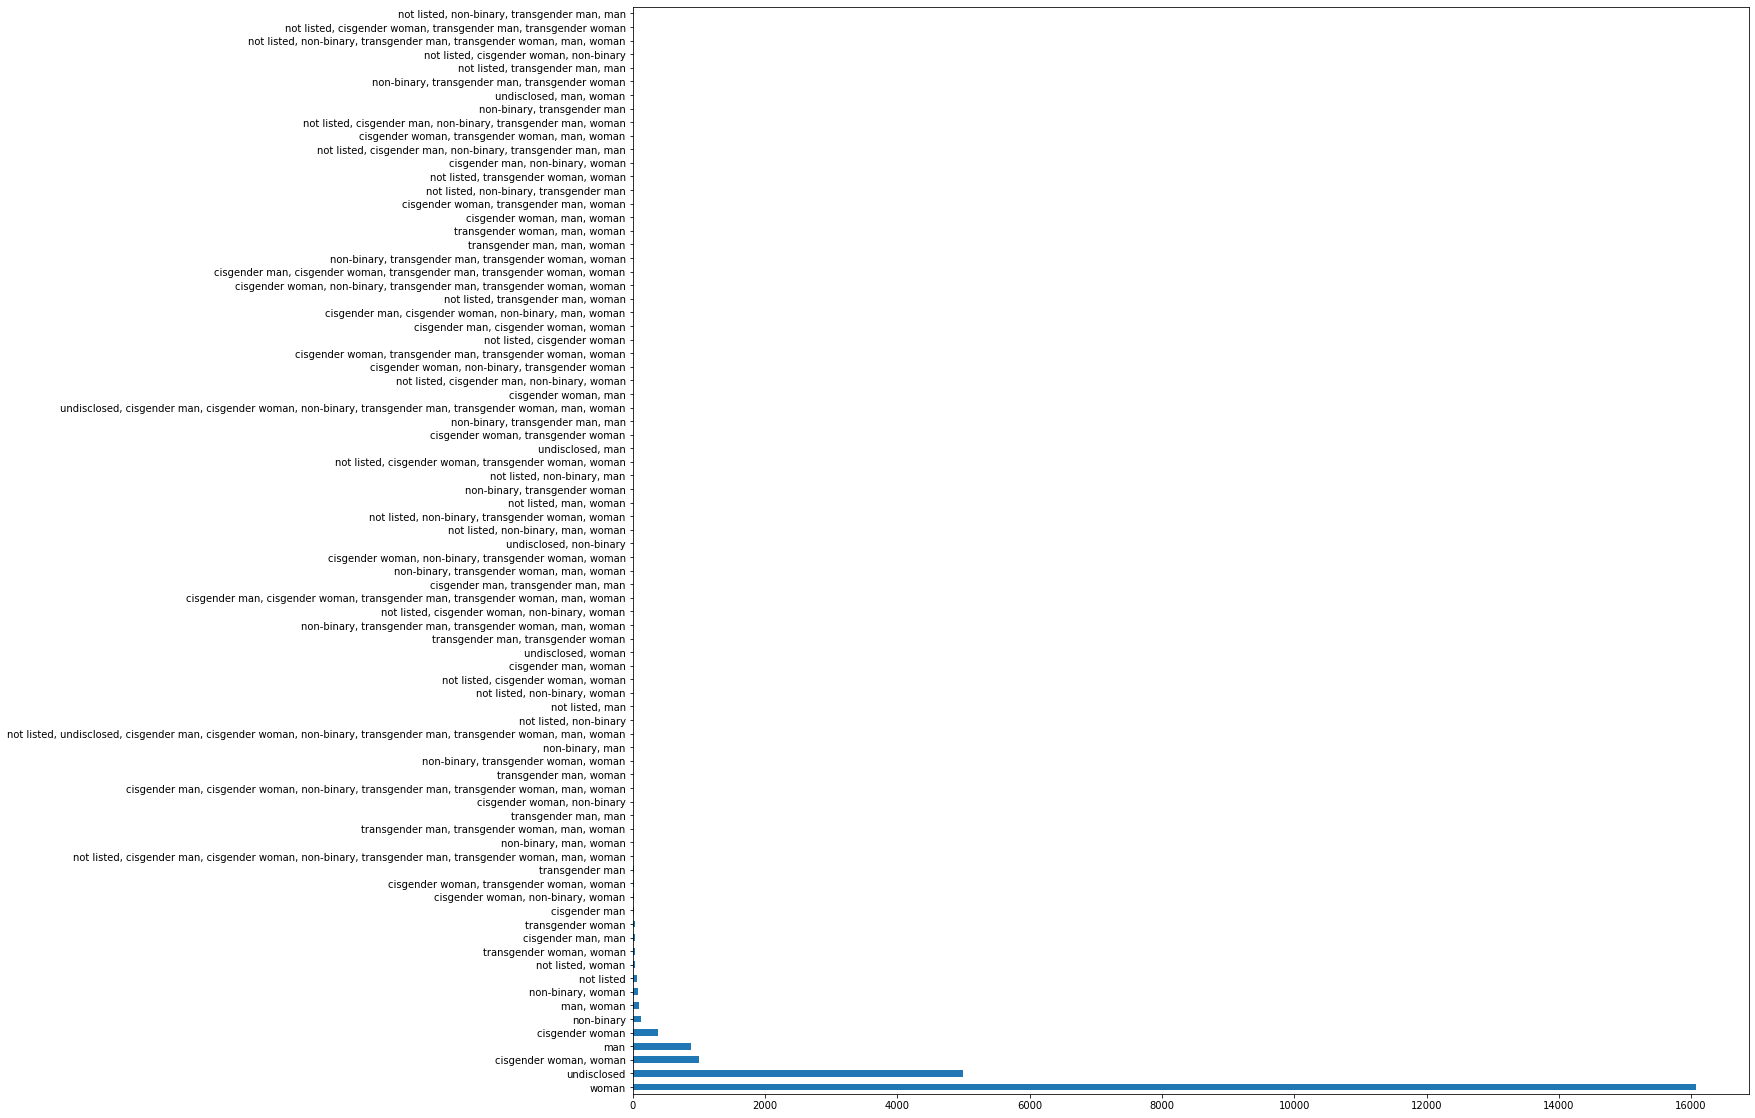

In [31]:
df['new'].value_counts().sort_values(ascending = False).plot.barh(figsize = (20,20))

In [3]:
nd = pd.read_csv('datathon-nlp-topics.csv')

In [55]:
nd.iloc[60:90,:]

,row_id,unique_id,comment,t_1,t_2,t_3,t_4,t_5,t_6,max_sc,topic
60,16336,12447911259,WOMEN HAVING A VOICE IN EVERYTHING AS MEN DO HAVE,0.714554,0.013357,0.085452,0.104477,0.069383,0.012776,0.714554,T1
61,5866,12408177799,"WOMEN WILL CEASE TO BE AFRAID, WILL BE ABLE TO...",0.714303,0.060247,0.133722,0.035035,0.046095,0.010599,0.714303,T1
62,2378,12384587304,ECONOMICALLY EMPOWERED,0.713214,0.004123,0.003309,0.141139,0.003449,0.134766,0.713214,T1
63,21157,12599581173,ON AN EQUAL FOOTING WITH MEN,0.711718,0.006040,0.223870,0.016158,0.040194,0.002020,0.711718,T1
64,18306,12535740517,"WOMEN ARE WEAKER THAN MEN PHYSICALLY, BUT STRO...",0.710101,0.036136,0.073425,0.090432,0.056686,0.033221,0.710101,T1
65,28910,12659294793,SELF-CONFIDENT,0.709546,0.002158,0.001732,0.282790,0.001805,0.001968,0.709546,T1
66,24321,12627282309,WE WILL HAVE INDEPENDENT WOMEN,0.708029,0.011140,0.052768,0.114468,0.093448,0.020147,0.708029,T1
67,1391,12352343336,THAT WOMAN GET PAID THE SAME AS MEN. THAT WE D...,0.705614,0.075779,0.114932,0.039169,0.039697,0.024808,0.705614,T1
68,11300,12441028048,I DON'`T KNOW....\R\N I JUST WANT EVERYTHING T...,0.700991,0.010816,0.052508,0.155024,0.063991,0.016670,0.700991,T1
69,12317,12455599780,BEING PROMINENT BUSINESS LADIES AND FINANCIALL...,0.699350,0.099233,0.080835,0.046078,0.050263,0.024241,0.699350,T1


In [53]:
from wordcloud import STOPWORDS

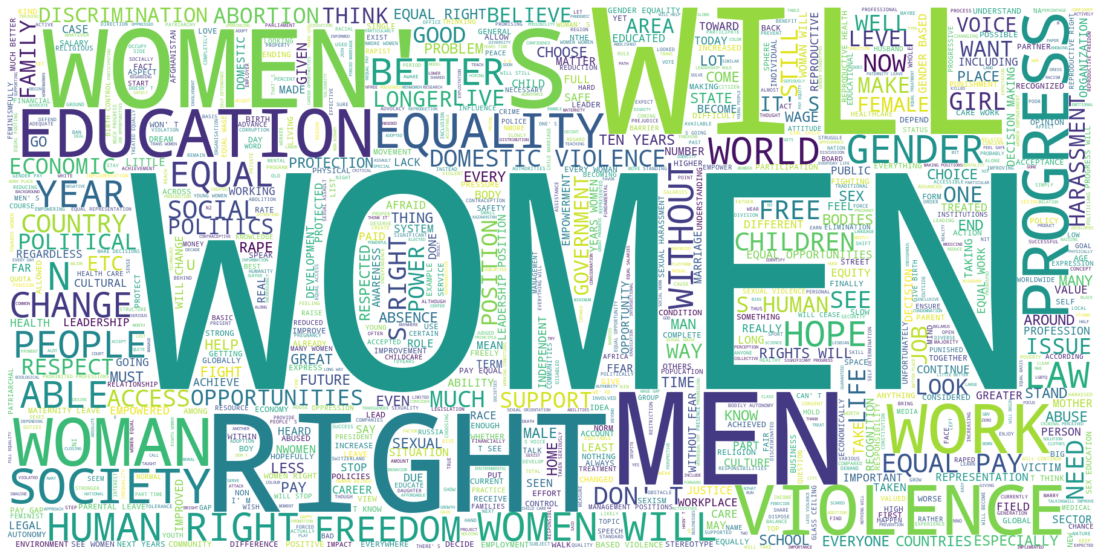

In [91]:
text = "".join(nd['comment'].fillna(value = ''))

plt.figure(figsize=(20,10))
WC = WordCloud(max_font_size=500, max_words=1000, background_color="white", width = 1800, height = 900).generate(text)
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()

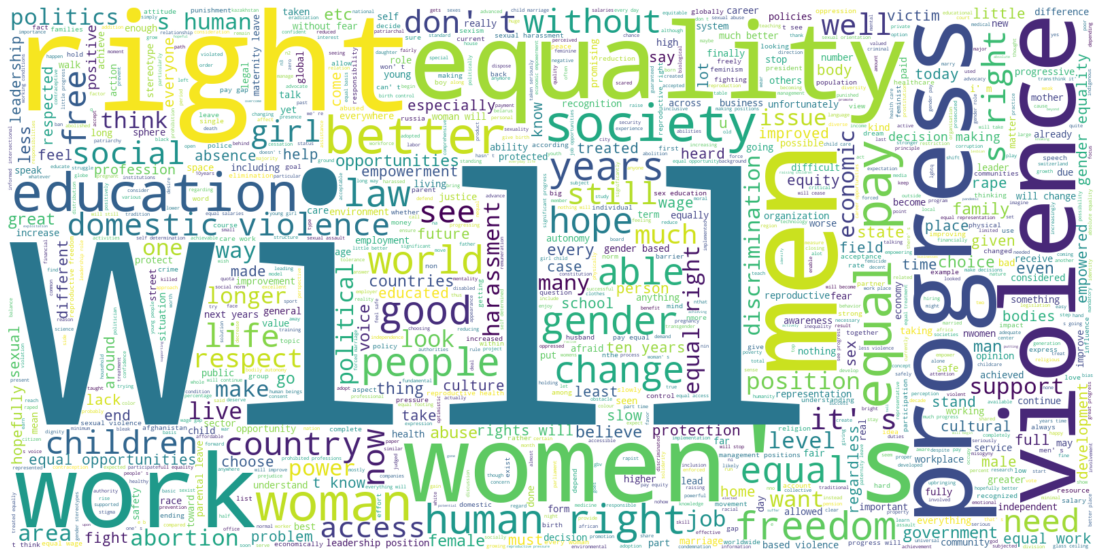

In [103]:
df['text'] = df['progress_10_years_tr'].fillna(value = '')

stopwords = set(STOPWORDS)
stopwords.update(["dtype", "object", "name", "progress_10_years_tr", "women","n", "won't", "don't", "year", "10"])

word_string= " ".join(df['text'].str.lower())
plt.figure(figsize=(20,10))
#WC = WordCloud(stopwords = stopwords, max_font_size=350, max_words=2000, background_color="white", width=1600, height=1600).generate(str(word_string))
WC = WordCloud(stopwords = stopwords, max_font_size=500, max_words=1000, background_color="white", width=1600, height=800).generate(word_string)
plt.imshow(WC, interpolation='bilinear')

plt.axis("off")
plt.show()